In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
#
#https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880
#
df = pd.read_csv("cases-among-vaccinated-197.csv", index_col=0)
df = df.fillna(0)
df = df.replace(['<5'],0)
#
#Set Language
language = "english" #german, else english
#
last_entry = df.index[-1] #Last Entry Date
#
if language == "german":
    s_titel1 = "Positive COVID-19 Fälle Israel (Gestapeltes Flächendiagramm)"
    s_subtitel1 = "Altersgruppen über 20 Jahre"
    s_subtitel2 = "Alle Altersgruppen"
    s_week = "Woche"
    s_xlbl1 = "Woche"
    s_fig2_suptitle = "COVID-19 Fälle Israel der letzten 10 Wochen"
    s_fig3_suptitle = "Verteilung positiver COVID-19 Fälle nach Impfstatus %s" %last_entry
    #
    s_1dose = "1. Dosis"
    s_2dose = "2. Dosis"
    s_3dose = "3. Dosis"
    s_unvac = "Nicht geimpft"
    #
    s_positive_1_6_days_after_1st_dose = "1-6 Tage nach 1. Dosis",
    s_positive_7_13_days_after_1st_dose = "7-13 Tage nach 1. Dosis",
    s_positive_14_20_days_after_1st_dose = "14-20 Tage nach 1. Dosis",
    s_positive_above_20_days_after_1st_dose = ">20 Tage nach 1. Dosis",
    s_positive_1_6_days_after_2nd_dose = "1-6 Tage nach 2. Dosis",
    s_positive_7_13_days_after_2nd_dose = "7-13 Tage nach 2. Dosis",
    s_positive_14_30_days_after_2nd_dose = "14-30 Tage nach 2. Dosis",
    s_positive_31_90_days_after_2nd_dose = "31-90 Tage nach 2. Dosis",
    s_positive_above_3_month_after_2nd_before_3rd_dose = ">90 Tage nach 2. Dosis",
    s_positive_1_6_days_after_3rd_dose = "1-6 Tage nach 3. Dosis",
    s_positive_7_13_days_after_3rd_dose = "7-13 Tage nach 3. Dosis",
    s_positive_14_30_days_after_3rd_dose = "14-30 Tage nach 3. Dosis",
    s_positive_31_90_days_after_3rd_dose = "31-90 Tage nach 3. Dosis",
    s_positive_above_90_days_after_3rd_dose = ">90 Tage nach 3. Dosis",
    s_Sum_positive_without_vaccination = "Nicht geimpft"
    #
    s_heatmap_title = "Heatmap: positive Fälle nach Impfstatus (Israel)"
    s_heatmap_adults_abs = "positive Fälle (absolut)\n Alle Altersgruppen über 20 Jahre"
    s_heatmap_adults_rel = "Wachstum zur Vorwoche (in %)\n Alle Altersgruppen über 20 Jahre"
    s_heatmap_all_abs = "positive Fälle (absolut)\n Alle Altersgruppen"
    s_heatmap_all_rel = "Wachstum zur Vorwoche (in %)\n Alle Altersgruppen"
    #
    s_source = "Quellendaten: https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880"
    #
else:
    s_titel1 = "Positive COVID-19 Cases Israel (Stacked Area Chart)"
    s_subtitel1 = "Age groups over 20 years"
    s_subtitel2 = "All Age groups"
    s_week = "Week"
    s_xlbl1 = "Week"
    s_fig2_suptitle = "COVID-19 Cases Israel of the last 10 weeks"
    s_fig3_suptitle = "Distribution of positive COVID-19 Cases by Vaccination status %s" %last_entry
    #
    s_1dose = "1st Dose"
    s_2dose = "2nd Dose"
    s_3dose = "3rd Dose"
    s_unvac = "Not vaccinated"
    #
    s_positive_1_6_days_after_1st_dose = "1-6 days after 1st dose",
    s_positive_7_13_days_after_1st_dose = "7-13 days after 1st dose",
    s_positive_14_20_days_after_1st_dose = "14-20 days after 1st dose",
    s_positive_above_20_days_after_1st_dose = ">20 days after 1st dose",
    s_positive_1_6_days_after_2nd_dose = "1-6 days after 2nd dose",
    s_positive_7_13_days_after_2nd_dose = "7-13 days after 2nd dose",
    s_positive_14_30_days_after_2nd_dose = "14-30 days after 2nd dose",
    s_positive_31_90_days_after_2nd_dose = "31-90 days after 2nd dose",
    s_positive_above_3_month_after_2nd_before_3rd_dose = ">90 days after 2nd dose",
    s_positive_1_6_days_after_3rd_dose = "1-6 days after 3rd dose",
    s_positive_7_13_days_after_3rd_dose = "7-13 days after 3rd dose",
    s_positive_14_30_days_after_3rd_dose = "14-30 days after 3rd dose",
    s_positive_31_90_days_after_3rd_dose = "31-90 days after 3rd dose",
    s_positive_above_90_days_after_3rd_dose = ">90 days after 3rd dose",
    s_Sum_positive_without_vaccination = "Not vaccinated",
    #
    s_heatmap_title = "Heatmap: positive Cases by Vaccination Status (Israel)"
    s_heatmap_adults_abs = "positive Cases (absolute)\n All Age Groups over 20 Years"
    s_heatmap_adults_rel = "Growth from previous week (in %)\n All Age Groups over 20 Years"
    s_heatmap_all_abs = "positive Cases (absolute)\n All Age Groups"
    s_heatmap_all_rel = "Growth from previous week (in %)\n All Age Groups"
    #
    s_source = "Source data: https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880"
    #
#
colors = ["azure", "lightcyan", "paleturquoise", "darkturquoise", 
          "lightblue", "skyblue", "lightskyblue", "deepskyblue", "dodgerblue",
          "plum","violet","orchid","m","purple",
          "orange"]
#
#
df.index.names = [s_week] #renames Index to s_week value
df_adults = df[df.Age_group != "0-19"] #remove age_group 0-19 and assign it to df_adults
#with pd.option_context("max_rows", None): #uncomment to show whole dataframe
#  display(df_adults)
#df_adults
#df

In [31]:
del df['Age_group'] #remove age_groups from dataframe
df = df.apply(pd.to_numeric) #turn everything to float
df = df.groupby(level=0).sum() #sum to weekly level
df.rename(columns={"positive_1_6_days_after_1st_dose": "%s" % s_positive_1_6_days_after_1st_dose,
                   "positive_7_13_days_after_1st_dose": "%s" % s_positive_7_13_days_after_1st_dose,
                   "positive_14_20_days_after_1st_dose": "%s" % s_positive_14_20_days_after_1st_dose,
                   "positive_above_20_days_after_1st_dose": "%s" % s_positive_above_20_days_after_1st_dose,
                   "positive_1_6_days_after_2nd_dose": "%s" % s_positive_1_6_days_after_2nd_dose,
                   "positive_7_13_days_after_2nd_dose": "%s" % s_positive_7_13_days_after_2nd_dose,
                   "positive_14_30_days_after_2nd_dose": "%s" % s_positive_14_30_days_after_2nd_dose,
                   "positive_31_90_days_after_2nd_dose": "%s" % s_positive_31_90_days_after_2nd_dose,
                   "positive_above_3_month_after_2nd_before_3rd_dose": "%s" % s_positive_above_3_month_after_2nd_before_3rd_dose,
                   "positive_1_6_days_after_3rd_dose": "%s" % s_positive_1_6_days_after_3rd_dose,
                   "positive_7_13_days_after_3rd_dose": "%s" % s_positive_7_13_days_after_3rd_dose,
                   "positive_14_30_days_after_3rd_dose": "%s" % s_positive_14_30_days_after_3rd_dose,
                   "positive_31_90_days_after_3rd_dose": "%s" % s_positive_31_90_days_after_3rd_dose,
                   "positive_above_90_days_after_3rd_dose": "%s" % s_positive_above_90_days_after_3rd_dose,
                   "Sum_positive_without_vaccination": "%s" % s_Sum_positive_without_vaccination,
                   }, inplace=True)
#df

In [32]:
del df_adults['Age_group']
df_adults = df_adults.apply(pd.to_numeric)
df_adults = df_adults.groupby(level=0).sum()
df_adults.rename(columns={"positive_1_6_days_after_1st_dose": "%s" % s_positive_1_6_days_after_1st_dose,
                   "positive_7_13_days_after_1st_dose": "%s" % s_positive_7_13_days_after_1st_dose,
                   "positive_14_20_days_after_1st_dose": "%s" % s_positive_14_20_days_after_1st_dose,
                   "positive_above_20_days_after_1st_dose": "%s" % s_positive_above_20_days_after_1st_dose,
                   "positive_1_6_days_after_2nd_dose": "%s" % s_positive_1_6_days_after_2nd_dose,
                   "positive_7_13_days_after_2nd_dose": "%s" % s_positive_7_13_days_after_2nd_dose,
                   "positive_14_30_days_after_2nd_dose": "%s" % s_positive_14_30_days_after_2nd_dose,
                   "positive_31_90_days_after_2nd_dose": "%s" % s_positive_31_90_days_after_2nd_dose,
                   "positive_above_3_month_after_2nd_before_3rd_dose": "%s" % s_positive_above_3_month_after_2nd_before_3rd_dose,
                   "positive_1_6_days_after_3rd_dose": "%s" % s_positive_1_6_days_after_3rd_dose,
                   "positive_7_13_days_after_3rd_dose": "%s" % s_positive_7_13_days_after_3rd_dose,
                   "positive_14_30_days_after_3rd_dose": "%s" % s_positive_14_30_days_after_3rd_dose,
                   "positive_31_90_days_after_3rd_dose": "%s" % s_positive_31_90_days_after_3rd_dose,
                   "positive_above_90_days_after_3rd_dose": "%s" % s_positive_above_90_days_after_3rd_dose,
                   "Sum_positive_without_vaccination": "%s" % s_Sum_positive_without_vaccination,
                   }, inplace=True)

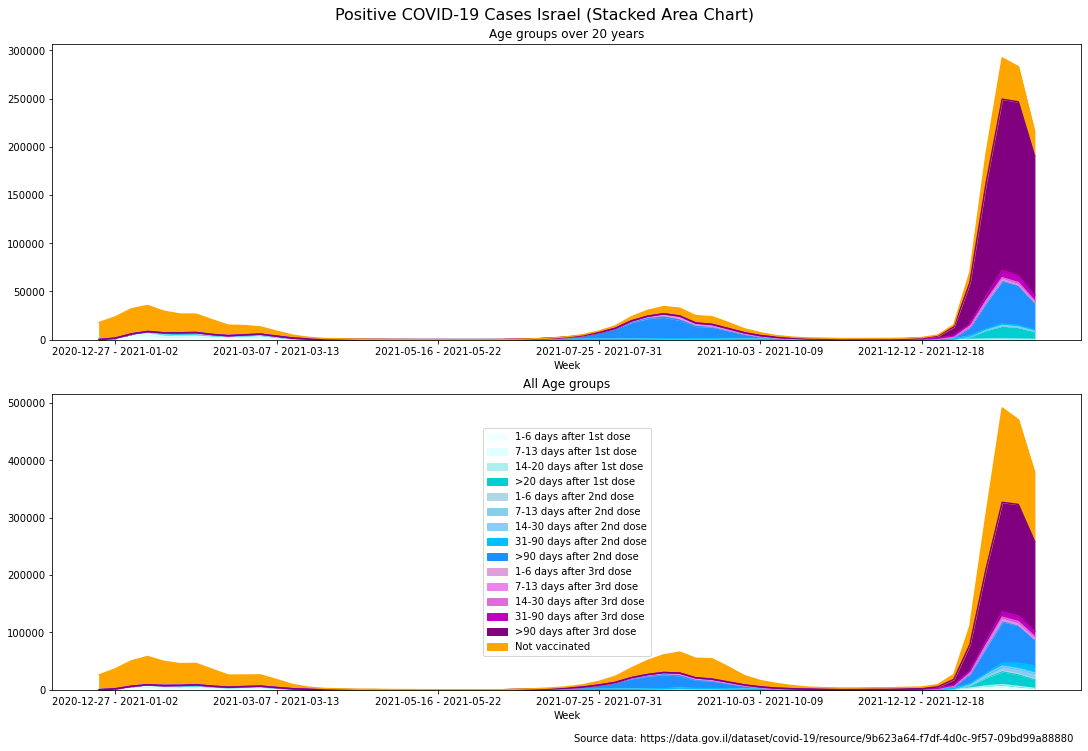

In [33]:
fig=plt.figure(figsize=(15,10),constrained_layout=True )
fig.suptitle(s_titel1, fontsize=16) #s_titel1
fig.tight_layout()
#
ax1=fig.add_subplot(211)
ax1.set_title(s_subtitel1) #s_subtitel1
#
ax2=fig.add_subplot(212)
ax2.set_title(s_subtitel2) #s_subtitel2
#
#
xtks = [1,11,21,31,41,51]
df_adults.plot.area(ax=ax1, color=colors, xlabel = s_week, xticks = xtks, legend=False)
df.plot.area(ax=ax2, color=colors, xlabel = s_xlbl1, xticks = xtks, legend=False)
plt.legend(loc='center')#, bbox_to_anchor=(1, 0.5))
plt.figtext(0.99, -0.025, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_detail_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

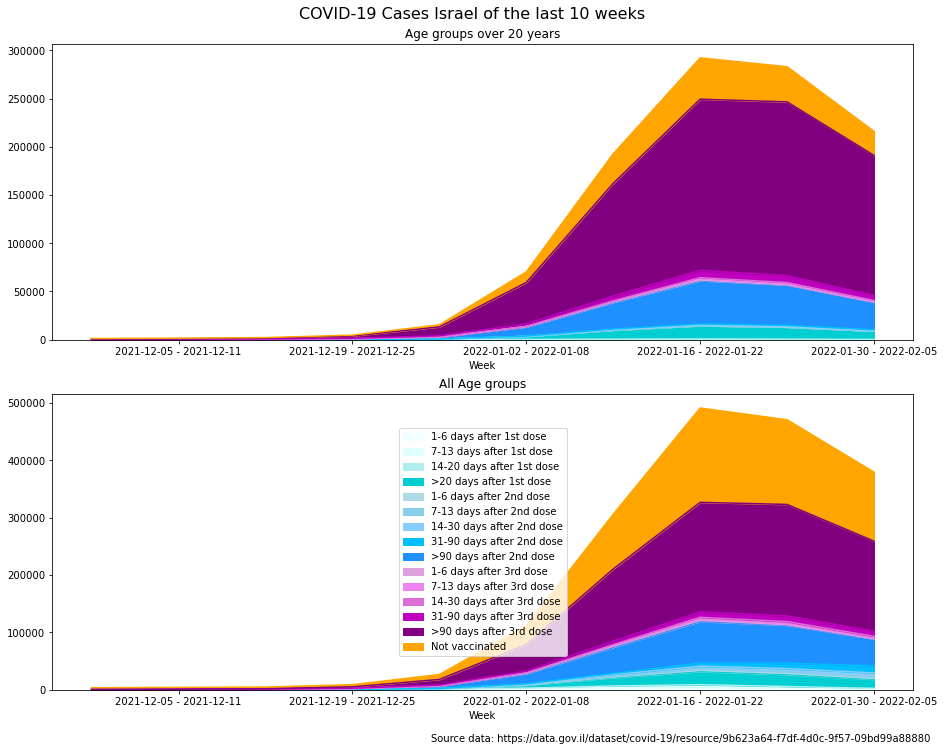

In [34]:
fig2=plt.figure(figsize=(13,10),constrained_layout=True )
fig2.suptitle(s_fig2_suptitle, fontsize=16)
fig2.tight_layout()

ax1=fig2.add_subplot(211)
ax1.set_title(s_subtitel1)
#
ax2=fig2.add_subplot(212)
ax2.set_title(s_subtitel2)
#
xtks = [1,3,5,7,9]
df_adults_recent = df_adults.tail(10)
df_recent = df.tail(10)
df_adults_recent.plot.area(ax=ax1, color=colors, xlabel = s_week, xticks = xtks, legend=False)
df_recent.plot.area(ax=ax2, color=colors, xlabel = s_xlbl1, xticks = xtks, legend=False)
plt.legend(loc='center')#, bbox_to_anchor=(1, 0.5))
plt.figtext(0.99, -0.025, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_detail_recent_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

In [35]:
#df_adults.tail()

In [36]:
sum_adults_first_shot = df_adults["%s" % s_positive_1_6_days_after_1st_dose] + df_adults["%s" % s_positive_7_13_days_after_1st_dose] + df_adults["%s" % s_positive_14_20_days_after_1st_dose] + df_adults["%s" % s_positive_above_20_days_after_1st_dose]
sum_adults_second_shot = df_adults["%s" % s_positive_1_6_days_after_2nd_dose] + df_adults["%s" % s_positive_7_13_days_after_2nd_dose] + df_adults["%s" % s_positive_14_30_days_after_2nd_dose] + df_adults["%s" % s_positive_31_90_days_after_2nd_dose] + df_adults["%s" % s_positive_above_3_month_after_2nd_before_3rd_dose]
sum_adults_third_shot = df_adults["%s" % s_positive_1_6_days_after_3rd_dose] + df_adults["%s" % s_positive_7_13_days_after_3rd_dose] + df_adults["%s" % s_positive_14_30_days_after_3rd_dose] + df_adults["%s" % s_positive_31_90_days_after_3rd_dose] + df_adults["%s" % s_positive_above_90_days_after_3rd_dose]
sum_adults_unvaccinated = df_adults["%s" % s_Sum_positive_without_vaccination]
#
df_sum_adults = pd.DataFrame()
df_sum_adults[s_1dose] = sum_adults_first_shot
df_sum_adults[s_2dose] = sum_adults_second_shot
df_sum_adults[s_3dose] = sum_adults_third_shot
df_sum_adults[s_unvac] = sum_adults_unvaccinated
#
df_sum_adults_no1d = df_sum_adults.drop(s_1dose, 1)
#
df_sum_adults.tail(10)

/var/folders/1r/4szl0y752x5dpjm5hqkghhlw0000gn/T/ipykernel_1180/2195496600.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_sum_adults_no1d = df_sum_adults.drop(s_1dose, 1)


,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2021-11-28 - 2021-12-04,32.0,350.0,430.0,435
2021-12-05 - 2021-12-11,41.0,402.0,594.0,536
2021-12-12 - 2021-12-18,56.0,469.0,1122.0,562
2021-12-19 - 2021-12-25,145.0,823.0,2877.0,885
2021-12-26 - 2022-01-01,571.0,2177.0,10487.0,2144
2022-01-02 - 2022-01-08,3412.0,9865.0,46032.0,10959
2022-01-09 - 2022-01-15,9876.0,28625.0,123595.0,30651
2022-01-16 - 2022-01-22,14404.0,46704.0,188233.0,42815
2022-01-23 - 2022-01-29,13003.0,43707.0,189884.0,36423


In [37]:
df_sum_adults.tail(10).pct_change()

,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2021-11-28 - 2021-12-04,NaN,NaN,NaN,NaN
2021-12-05 - 2021-12-11,0.281250,0.148571,0.381395,0.232184
2021-12-12 - 2021-12-18,0.365854,0.166667,0.888889,0.048507
2021-12-19 - 2021-12-25,1.589286,0.754797,1.564171,0.574733
2021-12-26 - 2022-01-01,2.937931,1.645200,2.645116,1.422599
2022-01-02 - 2022-01-08,4.975482,3.531465,3.389435,4.111474
2022-01-09 - 2022-01-15,1.894490,1.901673,1.684980,1.796879
2022-01-16 - 2022-01-22,0.458485,0.631581,0.522982,0.396855
2022-01-23 - 2022-01-29,-0.097265,-0.064170,0.008771,-0.149293


In [38]:
sum_all_first_shot = df["%s" % s_positive_1_6_days_after_1st_dose] + df["%s" % s_positive_7_13_days_after_1st_dose] + df["%s" % s_positive_14_20_days_after_1st_dose] + df["%s" % s_positive_above_20_days_after_1st_dose]
sum_all_second_shot = df["%s" % s_positive_1_6_days_after_2nd_dose] + df["%s" % s_positive_7_13_days_after_2nd_dose] + df["%s" % s_positive_14_30_days_after_2nd_dose] + df["%s" % s_positive_31_90_days_after_2nd_dose] + df["%s" % s_positive_above_3_month_after_2nd_before_3rd_dose]
sum_all_third_shot = df["%s" % s_positive_1_6_days_after_3rd_dose] + df["%s" % s_positive_7_13_days_after_3rd_dose] + df["%s" % s_positive_14_30_days_after_3rd_dose] + df["%s" % s_positive_31_90_days_after_3rd_dose] + df["%s" % s_positive_above_90_days_after_3rd_dose]
sum_all_unvaccinated = df["%s" % s_Sum_positive_without_vaccination]
#
df_sum_all = pd.DataFrame()
df_sum_all[s_1dose] = sum_all_first_shot
df_sum_all[s_2dose] = sum_all_second_shot
df_sum_all[s_3dose] = sum_all_third_shot
df_sum_all[s_unvac] = sum_all_unvaccinated
#
df_sum_all_no1d = df_sum_all.drop(s_1dose, 1)
#
df_sum_all.tail(10)

/var/folders/1r/4szl0y752x5dpjm5hqkghhlw0000gn/T/ipykernel_1180/3780295814.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_sum_all_no1d = df_sum_all.drop(s_1dose, 1)


,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2021-11-28 - 2021-12-04,145.0,461.0,437.0,2526
2021-12-05 - 2021-12-11,228.0,525.0,614.0,2857
2021-12-12 - 2021-12-18,228.0,663.0,1163.0,2740
2021-12-19 - 2021-12-25,483.0,1608.0,3060.0,3789
2021-12-26 - 2022-01-01,1706.0,4904.0,11448.0,8515
2022-01-02 - 2022-01-08,7972.0,20082.0,50982.0,32303
2022-01-09 - 2022-01-15,21182.0,52688.0,136582.0,95400
2022-01-16 - 2022-01-22,31793.0,87138.0,207759.0,164384
2022-01-23 - 2022-01-29,26568.0,85897.0,210559.0,147555


In [39]:
df_sum_all.tail(10).pct_change()

,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2021-11-28 - 2021-12-04,NaN,NaN,NaN,NaN
2021-12-05 - 2021-12-11,0.572414,0.138829,0.405034,0.131037
2021-12-12 - 2021-12-18,0.000000,0.262857,0.894137,-0.040952
2021-12-19 - 2021-12-25,1.118421,1.425339,1.631126,0.382847
2021-12-26 - 2022-01-01,2.532091,2.049751,2.741176,1.247295
2022-01-02 - 2022-01-08,3.672919,3.095024,3.453354,2.793658
2022-01-09 - 2022-01-15,1.657050,1.623643,1.679024,1.953286
2022-01-16 - 2022-01-22,0.500944,0.653849,0.521130,0.723103
2022-01-23 - 2022-01-29,-0.164344,-0.014242,0.013477,-0.102376


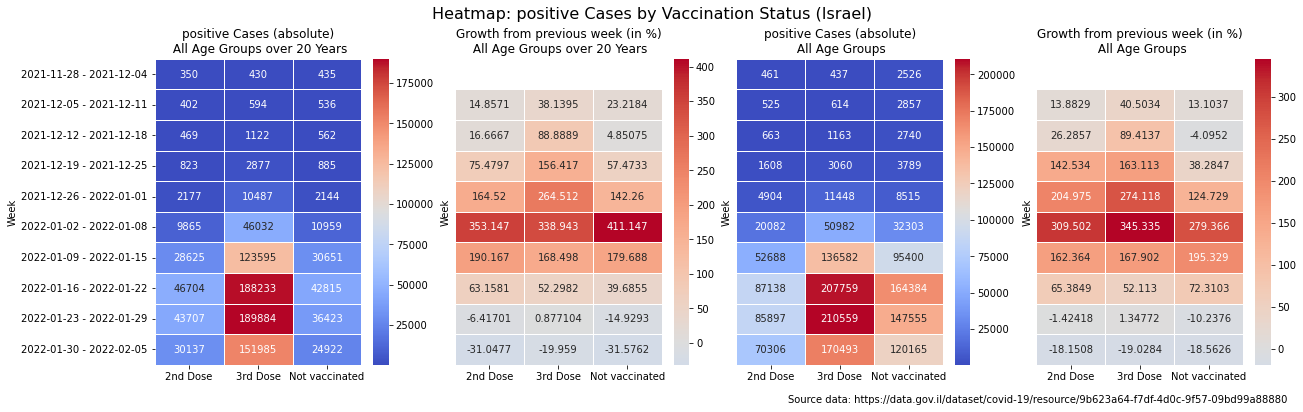

In [40]:
fig4=plt.figure(figsize=(18,5),constrained_layout=True)
fig4.suptitle(s_heatmap_title, fontsize=16, y=1.05)
#
df_h = df_sum_adults_no1d.tail(10)
df_h2 = df_sum_adults_no1d.tail(10).pct_change().mul(100)
#
df_h3 = df_sum_all_no1d.tail(10)
df_h4 = df_sum_all_no1d.tail(10).pct_change().mul(100)
#
ax10=fig4.add_subplot(141)
ax10.set_title(s_heatmap_adults_abs)
#
ax11=fig4.add_subplot(142)
ax11.set_title(s_heatmap_adults_rel)
#
ax12=fig4.add_subplot(143)
ax12.set_title(s_heatmap_all_abs)
#
ax13=fig4.add_subplot(144)
ax13.set_title(s_heatmap_all_rel)
#
#
sb.heatmap(df_h, ax=ax10, cmap="coolwarm", linewidths=0.5, annot=True, fmt="g")
sb.heatmap(df_h2, ax=ax11, cmap="coolwarm", yticklabels=False, center=0.00, annot=True, fmt="g", linewidths=0.5)
sb.heatmap(df_h3, ax=ax12, cmap="coolwarm", linewidths=0.5, yticklabels=False, annot=True, fmt="g")
sb.heatmap(df_h4, ax=ax13, cmap="coolwarm", yticklabels=False, center=0.00, annot=True, linewidths=0.5, fmt="g")
#plt.show()
plt.figtext(0.99, -0.05, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_heatmap_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

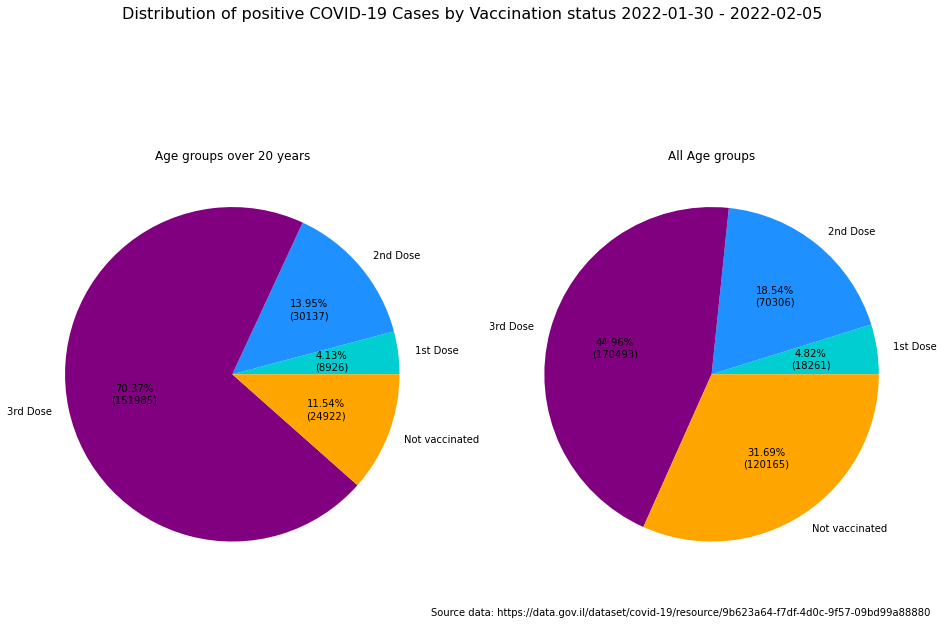

In [41]:
#
fig3=plt.figure(figsize=(13,10),constrained_layout=True)
fig3.suptitle(s_fig3_suptitle, fontsize=16)
#fig3.tight_layout()
ax5=fig3.add_subplot(121)
ax5.set_title(s_subtitel1)
#
ax6=fig3.add_subplot(122)
ax6.set_title(s_subtitel2)
#
abs_adults = df_sum_adults.iloc[-1]
abs_all = df_sum_all.iloc[-1]
#
pie_colors = ["darkturquoise","dodgerblue","purple","orange"]
#
df_sum_adults.iloc[-1].plot.pie(ax=ax5, colors=pie_colors,
                               autopct=lambda x: "{:.2f}%\n({:.0f})".format(x, x*abs_adults.sum()/100),ylabel="")
df_sum_all.iloc[-1].plot.pie(ax=ax6, colors=pie_colors,
                             autopct=lambda x: "{:.2f}%\n({:.0f})".format(x, x*abs_all.sum()/100),ylabel="")
plt.figtext(0.99, 0.15, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_piechart_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')
#df_sum_adults.index[-1]